# Amazon K-Means Clustering

In [2]:
import pandas as pd

df = pd.read_csv("Reviews_Full_Sentiment.csv", low_memory=False)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ConvertedDate,Summary,...,FiveStarFrequency,IsPerfect,ReviewYear,ReviewMonth,ReviewDay,AverageScorePerUser,DailyReviewRate,SummarySentiment,TextSentiment,SingleDayReviewFrequency
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,4/27/2011,Good Quality Dog Food,...,1,1,2011,4,27,5.000000,1.000000,0.7,0.450000,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,9/7/2012,Not as Advertised,...,0,0,2012,9,7,1.000000,1.000000,0.0,-0.033333,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,8/18/2008,"""Delight"" says it all",...,1,0,2008,8,18,4.333333,0.001585,0.0,0.133571,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,6/13/2011,Cough Medicine,...,0,0,2011,6,13,2.000000,3.000000,0.0,0.166667,3
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,10/21/2012,Great taffy,...,2,1,2012,10,21,5.000000,0.004914,0.8,0.483333,1


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ConvertedDate', 'Summary',
       'Text', 'CleanedText', 'InvalidHelpfulness', 'ReviewLength',
       'SummaryLength', 'UserReviewCount', 'FiveStarFrequency', 'IsPerfect',
       'ReviewYear', 'ReviewMonth', 'ReviewDay', 'AverageScorePerUser',
       'DailyReviewRate', 'SummarySentiment', 'TextSentiment',
       'SingleDayReviewFrequency'],
      dtype='object')

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the Features for Clustering
features = ['SingleDayReviewFrequency', 'TextSentiment', 'ReviewLength', 'Score']
X = df[features].copy()

X = X.fillna(0)

# Scaling the Data so that all features are in the same mathematical scale

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("----K Means Clustering----")

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering Complete!")

# Using group by 'Cluster' and then calculate the average for each feature
summary = df.groupby('Cluster')[features].mean()

# Add the count (How many reviews are in each cluster?)
summary['Count'] = df['Cluster'].value_counts()

print("\n----CLUSTER PROFILES----")
print(summary)

----K Means Clustering----
Clustering Complete!

----CLUSTER PROFILES----
         SingleDayReviewFrequency  TextSentiment  ReviewLength     Score  \
Cluster                                                                    
0                        5.604724       0.480741    236.200080  4.796454   
1                        3.371013       0.038884    412.425066  1.806346   
2                        2.383607       0.188697    397.564530  4.770088   
3                        4.424158       0.151587   1666.990326  4.194939   

          Count  
Cluster          
0        162155  
1        106654  
2        262670  
3         35765  


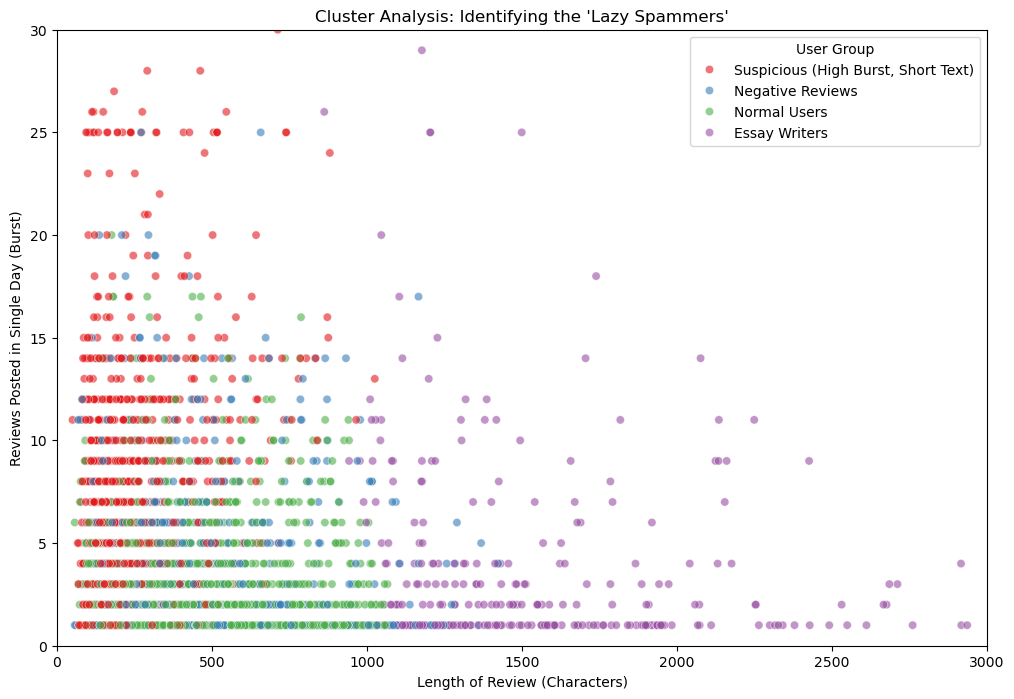

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a clear label map so the legend is easy to read
# We map the Cluster Numbers to the names we just identified
cluster_names = {
    0: 'Suspicious (High Burst, Short Text)', 
    1: 'Negative Reviews',
    2: 'Normal Users', 
    3: 'Essay Writers'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_names)

# Review Length vs. Frequency
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df.sample(5000, random_state=42), # Sample for speed/clarity
    x='ReviewLength', 
    y='SingleDayReviewFrequency', 
    hue='Cluster_Label', 
    palette='Set1',
    alpha=0.6
)

plt.title("Cluster Analysis: Identifying the 'Lazy Spammers'")
plt.xlabel("Length of Review (Characters)")
plt.ylabel("Reviews Posted in Single Day (Burst)")
plt.legend(title="User Group")
plt.xlim(0, 3000) 
plt.ylim(0, 30)   
plt.show()

C:\Users\visha\AppData\Local\Temp\ipykernel_26172\1799995270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='SingleDayReviewFrequency', ax=axes[0], palette='viridis')
C:\Users\visha\AppData\Local\Temp\ipykernel_26172\1799995270.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='ReviewLength', ax=axes[1], palette='magma')


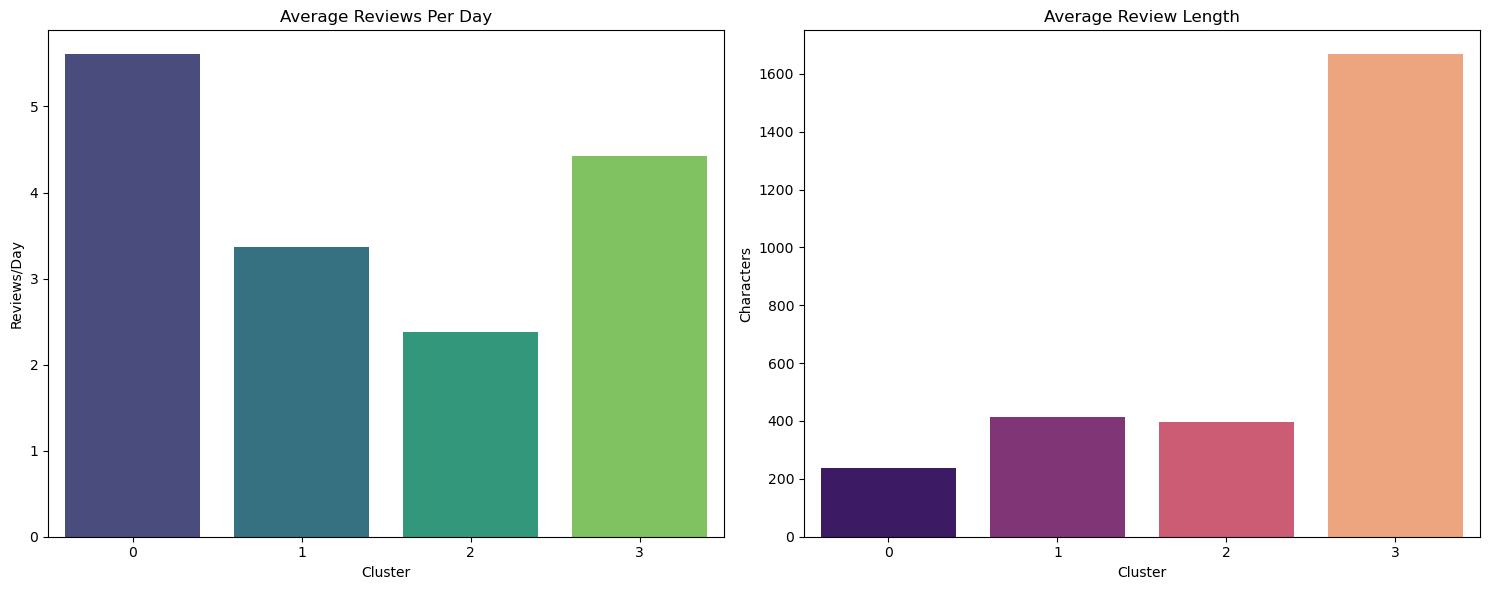

In [7]:
# Bar Chart
cluster_summary = df.groupby('Cluster')[['SingleDayReviewFrequency', 'ReviewLength', 'TextSentiment', 'Score']].mean().reset_index()
# Creating 2 bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#  Who is spamming? (Frequency)
sns.barplot(data=cluster_summary, x='Cluster', y='SingleDayReviewFrequency', ax=axes[0], palette='viridis')
axes[0].set_title("Average Reviews Per Day")
axes[0].set_ylabel("Reviews/Day")

#  Who is lazy? (Length)
sns.barplot(data=cluster_summary, x='Cluster', y='ReviewLength', ax=axes[1], palette='magma')
axes[1].set_title("Average Review Length")
axes[1].set_ylabel("Characters")

plt.tight_layout()
plt.show()

In [8]:
# Check for Duplicates 
print("----Checking for exact text duplication----")

# Rows where CleanedText is identical
duplicates = df[df.duplicated(subset=['CleanedText'], keep=False)]

# Filter for meaningful length (> 50 chars) so we ignore simple "Good product" reviews
real_copies = duplicates[duplicates['ReviewLength'] > 50]

print(f"   -> Result: Found {len(real_copies)} instances of 'Copy-Paste' reviews.")

if len(real_copies) > 0:
    print(f"   -> Example of copied text: '{real_copies.iloc[0]['CleanedText'][:60]}...'")
else:
    print("   -> No significant copy-paste behavior found.")

----Checking for exact text duplication----
   -> Result: Found 232213 instances of 'Copy-Paste' reviews.
   -> Example of copied text: 'if you are looking for the secret ingredient in robitussin i...'


In [9]:
# Get all the duplicated rows (232k) 
#  Filter for length > 50 to avoid "Good product" matches
long_dupes = df[df.duplicated(subset=['CleanedText'], keep=False)]
long_dupes = long_dupes[long_dupes['ReviewLength'] > 50]

# Group by the TEXT to see who wrote it
# We count how many UNIQUE UserIds are associated with each text
# If unique_users == 1, it's just the same person (Amazon Variant) -> IGNORE
# If unique_users > 1, it's different people copying each other -> FRAUD
plagiarism_check = long_dupes.groupby('CleanedText')['UserId'].nunique()

amazon_redundancy = plagiarism_check[plagiarism_check == 1]
true_fraud = plagiarism_check[plagiarism_check > 1]

print(f"Total Duplicate Rows: {len(long_dupes)}")
print(f"1. Amazon Redundancy (Same user, diff product): {len(amazon_redundancy)} unique texts")
print(f"2. TRUE FRAUD (Different users, same text):     {len(true_fraud)} unique texts")

Total Duplicate Rows: 232213
1. Amazon Redundancy (Same user, diff product): 58134 unique texts
2. TRUE FRAUD (Different users, same text):     45 unique texts


In [10]:
# Calculate total rows involved in the 45 fraud cases
fraud_rows = df[df['CleanedText'].isin(true_fraud.index)]
print(f"Total Confirmed Fraud Reviews: {len(fraud_rows)}")

Total Confirmed Fraud Reviews: 141


# Amazon Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Using cluster 0 as fake 
df['Is_Fake'] = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)

features_list = ['SingleDayReviewFrequency', 'TextSentiment', 'ReviewLength', 'Score']
X = df[features_list].fillna(0)
y = df['Is_Fake']

# Split & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We use max_depth = 4 to keep the diagram readable
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Checking Accuracy
acc = dt_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {acc*100:.2f}%")

Decision Tree Accuracy: 95.54%


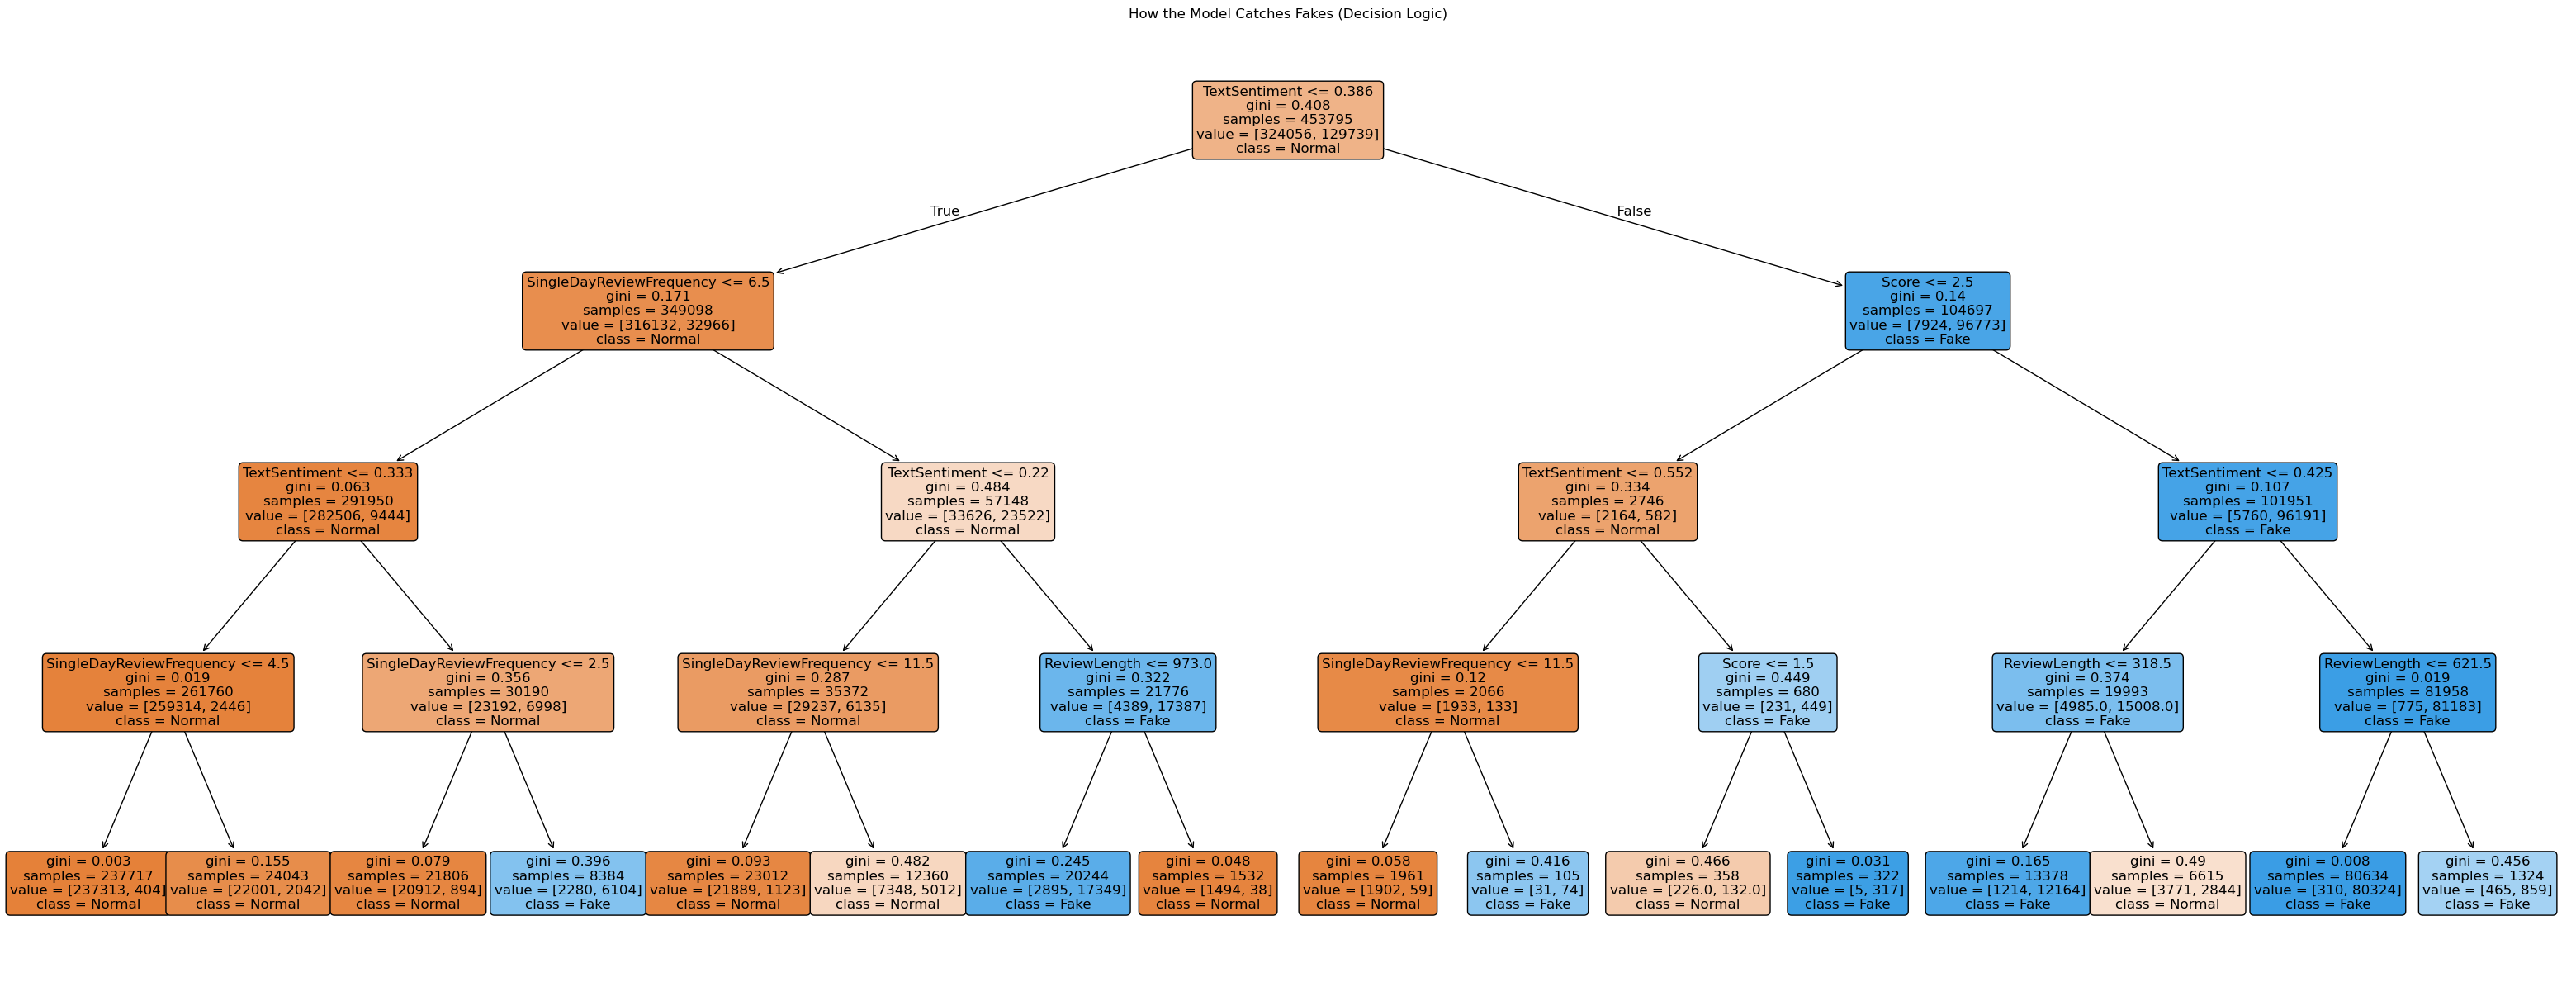

In [12]:
# Logic Diagram
plt.figure(figsize=(40, 15))
plot_tree(dt_model, 
          feature_names=features_list, 
          class_names=['Normal', 'Fake'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("How the Model Catches Fakes (Decision Logic)")
plt.show()

C:\Users\visha\AppData\Local\Temp\ipykernel_26172\2263465164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


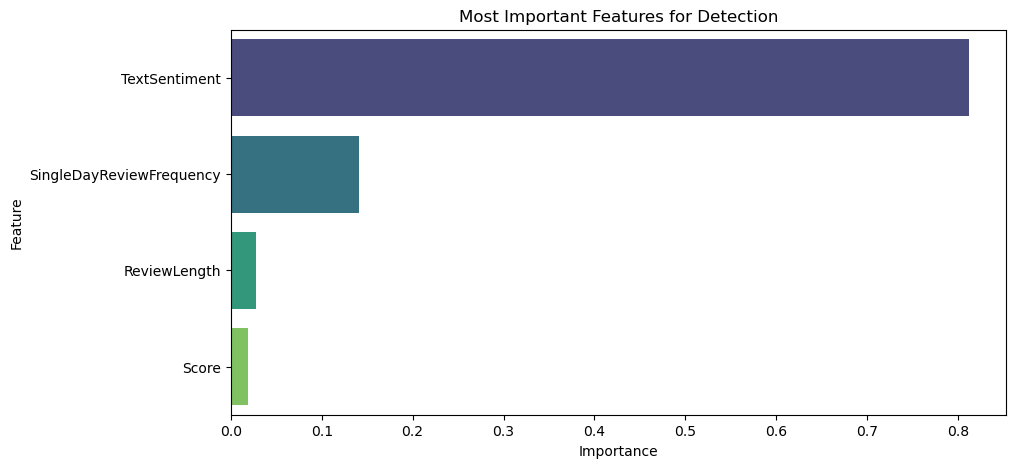

In [13]:
# Bar Chart
importances = pd.DataFrame({
    'Feature': features_list,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title("Most Important Features for Detection")
plt.show()

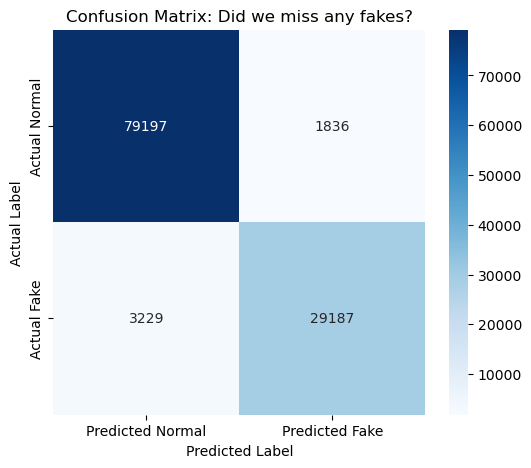

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97     81033
        Fake       0.94      0.90      0.92     32416

    accuracy                           0.96    113449
   macro avg       0.95      0.94      0.94    113449
weighted avg       0.96      0.96      0.96    113449



In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal', 'Predicted Fake'],
            yticklabels=['Actual Normal', 'Actual Fake'])



plt.title("Confusion Matrix: Did we miss any fakes?")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Normal', 'Fake']))

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("----RUNNING 5-FOLD CROSS VALIDATION----")


# Pass the whole X and y, and the function splits it automatically 5 times

scores = cross_val_score(dt_model, X, y, cv=5)

print("\nResults:")
print(f"Scores for each run: {scores}")
print(f"Average Accuracy:    {scores.mean()*100:.2f}%")
print(f"Standard Deviation:  {scores.std()*100:.3f}")


----RUNNING 5-FOLD CROSS VALIDATION----

Results:
Scores for each run: [0.95807808 0.95556594 0.95828081 0.95416443 0.95858896]
Average Accuracy:    95.69%
Standard Deviation:  0.176


C:\Users\visha\AppData\Local\Temp\ipykernel_26172\2158028096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=folds, y=scores_pct, palette='viridis')


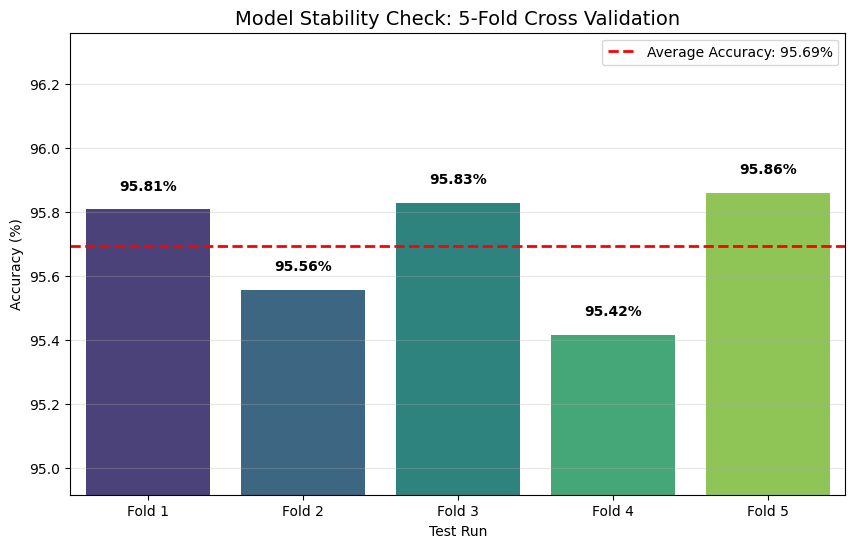

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

scores_pct = scores * 100
folds = [f'Fold {i+1}' for i in range(len(scores))]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=folds, y=scores_pct, palette='viridis')

mean_score = scores_pct.mean()
plt.axhline(y=mean_score, color='red', linestyle='--', linewidth=2, label=f'Average Accuracy: {mean_score:.2f}%')

for i, v in enumerate(scores_pct):
    ax.text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom', fontweight='bold')

plt.title("Model Stability Check: 5-Fold Cross Validation", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Run")

plt.ylim(min(scores_pct) - 0.5, max(scores_pct) + 0.5) 
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()